# **Modelado y analitica de datos**
## Titanic.

In [ ]:
#Importamos las librerías necesarias para el análisis exploratorio
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##**1. Análisis descriptivo**

In [ ]:
#Cargamos el dataset en un dataframe y mostramos 5 filas
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Conocer la estructura del dataset, su tamaño, tipos de datos y faltantes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#Resumen estadístico de las variables numéricas
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###**Distribución de las variables numéricas.**

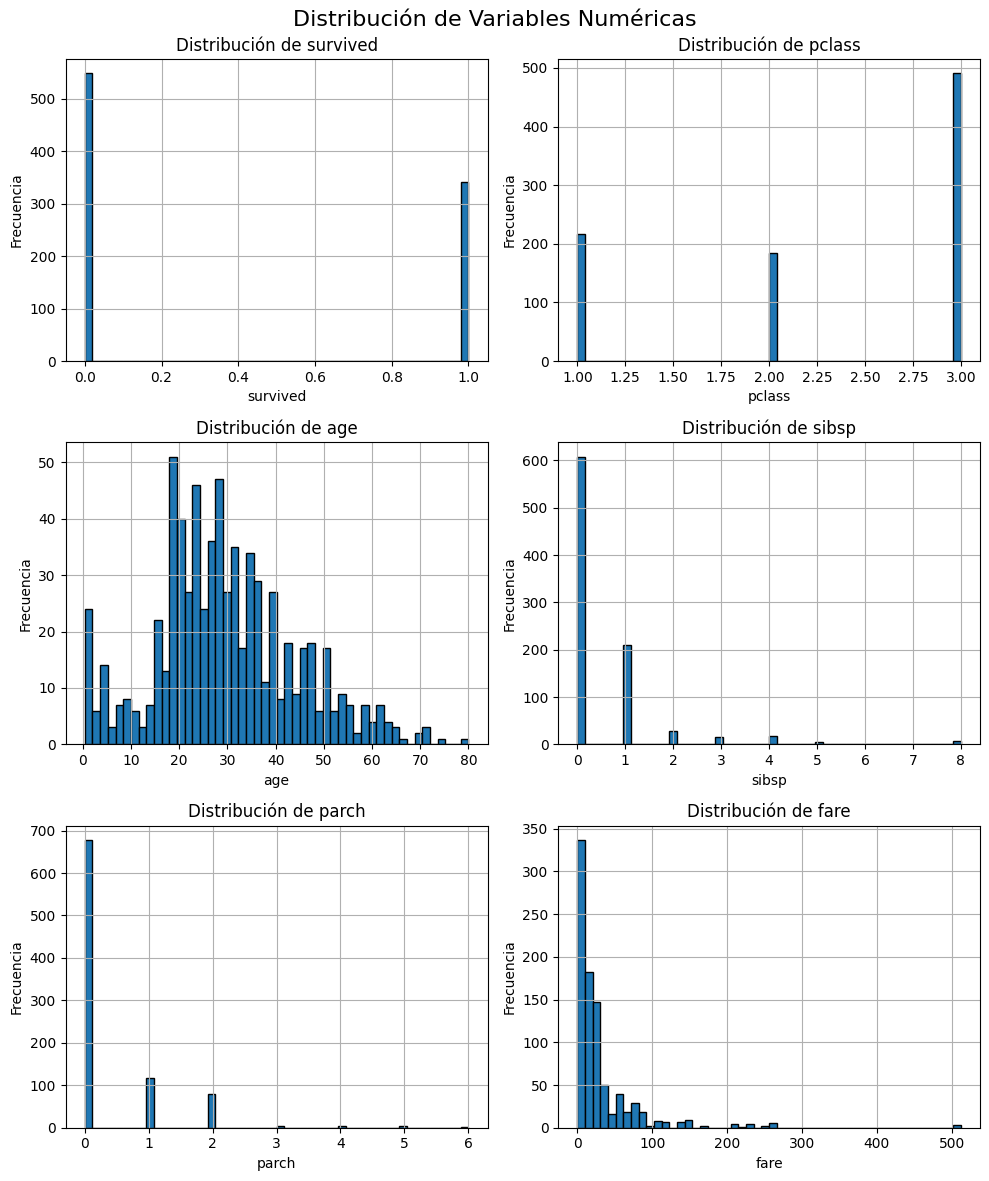

In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = titanic.select_dtypes(include=[np.number]).columns

# Calcular el número de filas y columnas para el subplot
n = len(columnas_numericas)
nrows = 3
ncols = 2

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(10, 4 * nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    titanic[col].hist(ax=ax, bins=50, edgecolor='black')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##**2. Ajuste de los tipos de datos de variables.**

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

**Significado de las columnas**

* **survived.**	Sobrevivió:	0 = No, 1 = Yes
* **pclass.**	Clase:	1 = primera, 2 = segunda, 3 = tercera
* **sex.**	Género
* **age.**	Edad
* **sibsp.**	Número de hermanos o cónyuges a bordo
* **parch.**	Número de padres o hijos a bordo
* **fare.**	Tarifa
* **embarked.**	Puerto de embarco:	C = Cherbourg, Q = Queenstown, S = Southampton
* **class.** Clase con valor categórico
* **who.** Género
* **adult_male.** Si es hombre. Otra forma de *sex* y *who*
* **deck.** Cabina. La letra indica el nivel
* **embark_town.** Puerto de embarco
* **alive.** Sobrevivió como categórica
* **alone.** Si el pasajero viajaba solo. Variante lógica de *sibsp* y *parch*

In [ ]:
# Ajustar el tipo de la variable survived a categórica
#print(titanic['survived'].unique())
#titanic['survived'] = titanic['survived'].astype('category')

In [ ]:
# Ajustar el tipo de la variable pclass a categórica
#print(titanic['pclass'].unique())
#titanic['pclass'] = titanic['pclass'].astype('category')


##**3. Detección y tratamiento de datos ausentes.**

In [ ]:
# Devuelve un DataFrame booleano
#print(titanic.isna())

# Devuelve True si hay al menos un valor ausente
if titanic.isna().any().any():
    print('Hay valores ausentes')
else:
    print('No hay valores ausentes')

# Devuelve el número total de NaN que presenta el DataFrame
print('Valores ausentes: ', titanic.isna().sum().sum())
# Devuelve el porcentaje de valores ausentes
print('Porcentaje :', round(titanic.isna().mean().mean(), 2), ' %')

# Detección del número de valores ausentes en cada una de las columnas
print('\n Valores ausentes por columna \n')
print(titanic.isna().sum())

# Detección del porcentaje de valores ausentes en cada una de las columnas
print('\n Porcentaje de valores ausentes por columna \n')
titanic.isna().mean().round(2).rename('Porcentaje')

Hay valores ausentes
Valores ausentes:  869
Porcentaje : 0.07  %

 Valores ausentes por columna 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 Porcentaje de valores ausentes por columna 



,Porcentaje
survived,0.00
pclass,0.00
sex,0.00
age,0.20
sibsp,0.00
parch,0.00
fare,0.00
embarked,0.00
class,0.00
who,0.00


In [ ]:
#Datos de los pasajeros sin registro de su edad
titanic[titanic['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


### **Imputación.**

In [ ]:
# Sustituimos los valores NaN de la columna age por su media y los transformamos a enteros
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['age'] = titanic['age'].astype('int')

In [ ]:
#Borramos la columna deck y otras que no son necesarias para el análisis
titanic.drop(['sibsp', 'parch', 'embarked', 'adult_male', 'deck', 'alone'], axis=1, inplace = True)

In [ ]:
#Agregamos una columna que nos indica si el pasajero era menor de 18 años
titanic['child'] =  titanic.apply(lambda row: 1 if row['age'] < 18 else 0, axis=1)

## **4. Identificación de datos atípicos.**

Estadísticas para fare:
Q1 - 1.5IQR = -26.72
Q1 = 7.91
Mediana = 14.45
Q3 = 31.00
Q3 + 1.5IQR = 65.63
Número de observaciones: 891
Número de outliers: 116


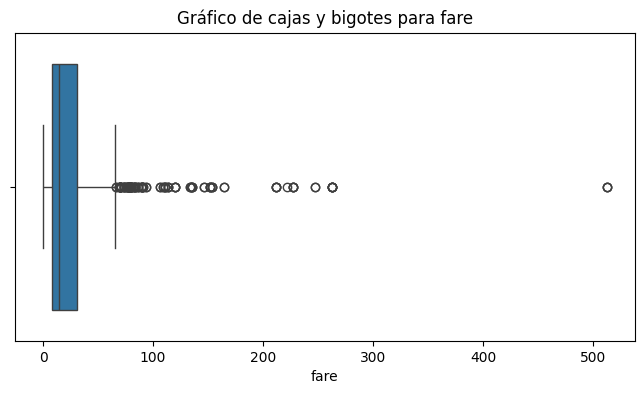

In [ ]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Estadísticas para fare:")
print(f"Q1 - 1.5IQR = {lower_bound:.2f}")
print(f"Q1 = {Q1:.2f}")
print(f"Mediana = {titanic['fare'].median():.2f}")
print(f"Q3 = {Q3:.2f}")
print(f"Q3 + 1.5IQR = {upper_bound:.2f}")
print(f"Número de observaciones: {len(titanic['fare'])}")
print(f"Número de outliers: {sum((titanic['fare'] < lower_bound) | (titanic['fare'] > upper_bound))}")

# Construcción del gráfico de cajas y bigotes
plt.figure(figsize=(8, 4))
sns.boxplot(x=titanic['fare'])
plt.title('Gráfico de cajas y bigotes para fare')
plt.xlabel('fare')
plt.show()

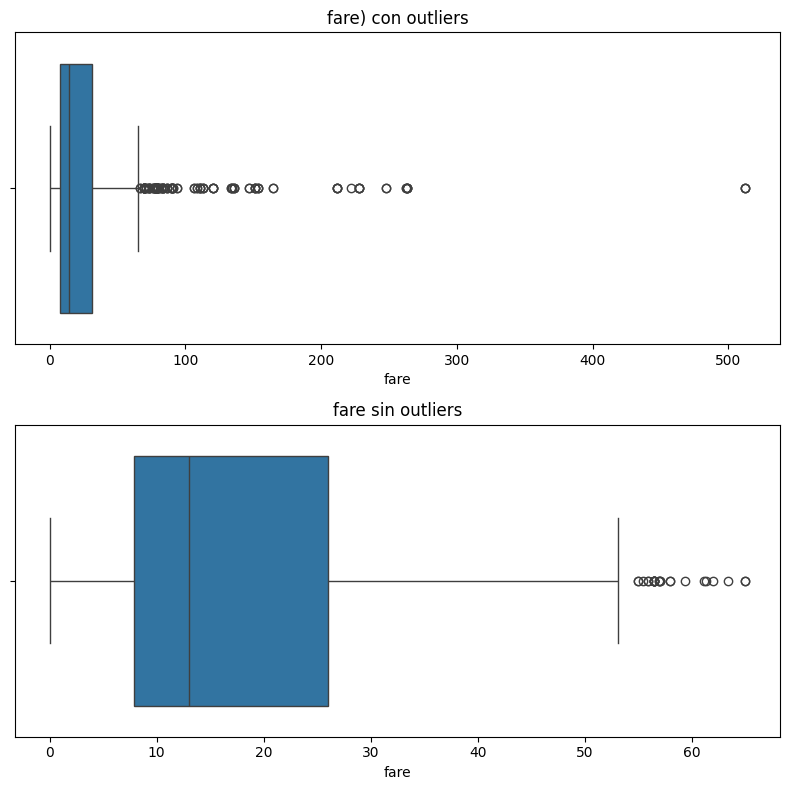

In [ ]:
# Se genera una nueva tabla que no contiene los valores identificados como atípicos
titanic_NoOut = titanic[(titanic['fare'] >= lower_bound) &
(titanic['fare'] <= upper_bound)]

# Construcción de los gráficos de cajas y bigotes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

sns.boxplot(x=titanic['fare'], ax=ax1)
ax1.set_title('fare con outliers')
ax1.set_xlabel('fare')

sns.boxplot(x=titanic_NoOut['fare'], ax=ax2)
ax2.set_title('fare sin outliers')
ax2.set_xlabel('fare')

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
def detect_outliers(df, features):
    outlier_indices= []

    for i in features:
        # 1st quartile
        Q1 = np.percentile(df[i], 25)

        # 3rd quartile
        Q3 = np.percentile(df[i], 75)

        #IQR
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = IQR * 1.5

        # detect outlier and their indeces
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index

        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

## **5. Análisis de correlación entre variables.**

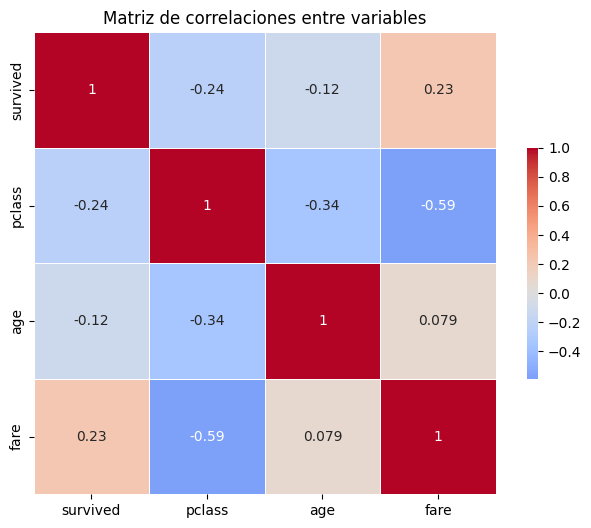

In [ ]:
num_variables = titanic_NoOut.select_dtypes(include=[np.number])

# Calculamos la matriz de coeficientes de correlación entre las variables numéricas
correlacion = num_variables.corr()

# Configuración del gráfico de correlación
plt.figure(figsize=(8, 6))

# Gráfico de correlaciones utilizando un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de correlaciones entre variables')
plt.show()

In [ ]:
survived_sex = pd.crosstab(index = titanic['survived'], columns = titanic['sex'])
survived_sex.index = ['Murió', 'Sobrevivió']
survived_sex.columns = ['Mujer', 'Hombre']
survived_sex

,Mujer,Hombre
Murió,81,468
Sobrevivió,233,109


In [ ]:
survived_class = pd.crosstab(index = titanic['survived'], columns = titanic['pclass'], margins = True)
survived_class.index = ['Murió', 'Sobrevivió', 'Total por clase']
survived_class.columns = ['Primera', 'Segunda', 'Tercera', 'Total']
survived_class

,Primera,Segunda,Tercera,Total
Murió,80,97,372,549
Sobrevivió,136,87,119,342
Total por clase,216,184,491,891


In [ ]:
round(survived_class/survived_class.loc['Total por clase', 'Total'] * 100, 2)

,Primera,Segunda,Tercera,Total
Murió,8.98,10.89,41.75,61.62
Sobrevivió,15.26,9.76,13.36,38.38
Total por clase,24.24,20.65,55.11,100.00


In [ ]:
round(survived_class/survived_class.loc['Total por clase'] * 100, 2)

,Primera,Segunda,Tercera,Total
Murió,37.04,52.72,75.76,61.62
Sobrevivió,62.96,47.28,24.24,38.38
Total por clase,100.00,100.00,100.00,100.00


In [ ]:
survived_age = pd.crosstab(index = titanic['survived'], columns = titanic['age'])
survived_age.index = ['Murió', 'Sobrevivió']
#survived_sex.columns = ['Mujer', 'Hombre']
survived_age

age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Murió,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
Sobrevivió,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


<ipython-input-195-88cc08c8aba2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aux = titanic.groupby(['class', 'sex', 'alive']).size().reset_index(name = 'total')
<ipython-input-195-88cc08c8aba2>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = pd.pivot_table(


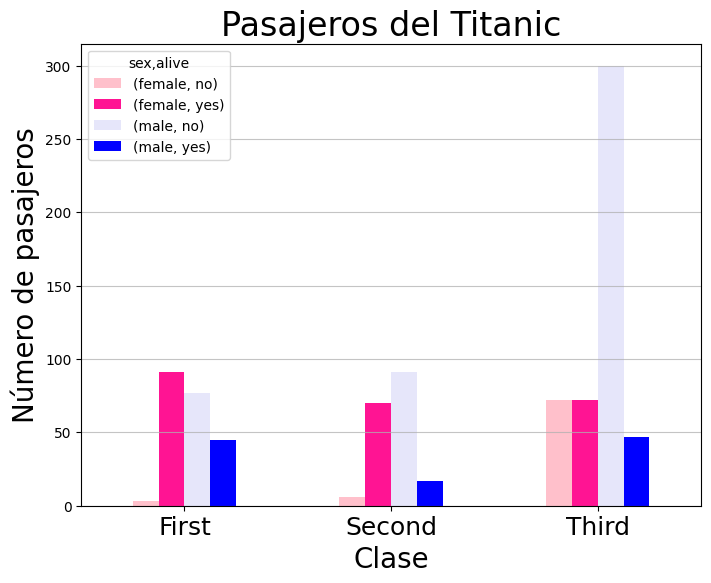

In [ ]:
df_aux = titanic.groupby(['class', 'sex', 'alive']).size().reset_index(name = 'total')
#df_aux["año"] = df_aux['fecha'].dt.year
#df_aux.sort_values(by = "año", inplace = True)

df_pivot = pd.pivot_table(
    df_aux,
    values = 'total',
    index = 'class',
    columns = ['sex', 'alive'],
    aggfunc = 'sum'
)

ax = df_pivot.plot(kind = 'bar', color = ['pink', 'deeppink', 'lavender', 'blue'])

fig = ax.get_figure()
fig.set_size_inches(8, 6)
ax.set_title('Pasajeros del Titanic', fontsize = 24)
ax.set_xlabel('Clase', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 18, rotation = 0)
ax.set_ylabel('Número de pasajeros', fontsize = 20)
ax.grid(visible = True, axis = 'y', alpha = 0.75)

plt.show()